In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'/Users/veyselaytekin/Desktop/byte/exercises/machine_learning/datasets/transfusion.data.csv')

target_col = 'whether he/she donated blood in March 2007'

print(f"df shape : {df.shape}")
df.head()

df shape : (748, 5)


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
# Recency (months): en son bagis yaptigindan bugune gecen süre
# Frequency (times): kac kere bagis yaptigi
# Monetary (c.c. blood) (Miktar - c.c. Kan): toplamda ne kadar kan bagisi yaptigi
# Time (months) (Süre - Aylar): kisinin ilk kan bagisindan bugune gecen süre 

In [4]:
new_names = {
    'whether he/she donated blood in March 2007' : 'March Blood Donate'
}
df = df.rename(columns=new_names)
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),March Blood Donate
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recency (months)       748 non-null    int64
 1   Frequency (times)      748 non-null    int64
 2   Monetary (c.c. blood)  748 non-null    int64
 3   Time (months)          748 non-null    int64
 4   March Blood Donate     748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [6]:
num_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist() # exclude object ve category'i haric tut anlamina geliyor geriye numerical kaliyor
cat_cols = df.select_dtypes(include=['category']).columns.tolist() # categorical türleri alir

# tolist bu sonuclari bir liste haline getiriyor

In [7]:
#  Örneğin, sayısal veriler doğrudan modellemeye dahil edilebilirken,
#  kategorik veriler genellikle one-hot encoding, label encoding gibi yöntemlerle sayısallaştırılır.

In [8]:
# Total summary

def set_frame_style(df, caption = ""): 
    """Helper function to set dataframe presentation style."""
    return df.style.background_gradient(cmap='Blues').set_caption(caption).set_table_styles([{
        'selector': 'caption', # selector , yani seciyor. bunun basliga uygulanacagini seciyor
        'props': [
            ('color', 'Blue'),
            ('front-size', '18px'),
            ('font-weight', 'bold')
        ]}])
# caption baslik bölümü asagida fonksiyon cagrilirken oraya istenilen deger girilir
# pandas'in sytle bölümüne erisip ordan degisiklikleri yapmak icin kullnailiyor
# fareyi üstüne getirince mavi yapiyor

def check_data(data, title):
    cols = data.columns.to_list()
    display(set_frame_style(data[cols].head(), f'{title}: First 5 Rows of Data'))
    display(set_frame_style(data[cols].describe(), f'{title}: Summary Statistics'))
    display(set_frame_style(data[cols].nunique().to_frame().rename({0:'Unique Value Count'}, axis=1).transpose(), f'{title}: Unique Value Count in Each Column'))
    display(set_frame_style(data[cols].isna().sum().to_frame().transpose(), f'{title}: Columns With NaN'))

check_data(df, 'Train data')
print('-'*100)

# büyük degerleri mavi ile gösteriyor
# ama github ta normal gözüküyor sadece üzerine gelince mavi yapiyor.
# belkide onuda yapmiyor githubin özelligi olabilir tam denemedim

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),March Blood Donate
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),March Blood Donate
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),March Blood Donate
Unique Value Count,31,33,33,78,2


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),March Blood Donate
0,0,0,0,0,0


----------------------------------------------------------------------------------------------------


In [9]:
class CFG:
    """
    Purpose of the Class:
    - Transforming the feature engineering stage into an open-close format to reduce bugs
    - Expand/demonstrate the scope of tested features in the final solution, even if some features are not present.
    """
    
    target_col = 'March Blood Donate'
    
    pass  #burda yer tutucu olarak görev aliyor icerigi ve islevi tam ayarlanmamis yapilarin
# bir nevi calisir durumda kalmasi icin kullanilir


# CFG : bu sabit degerleri belli bir yerde tutmak icin olusturulan bir class yapisidir

# Train | Test Split

In [10]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=34, stratify=df[CFG.target_col])

# burda da cok oroginal birsey var. sadece datayi böldü 
# target degiskenini ayri olarak ele almadi
# nedenini bilmiyorum ama suan bölünmüs datada target sütunuda var yani =March Blood Donate

# neden target'i ayirmadigini anladim asagida görsellestirme yapacak
# simdilik fit islemi icin kullanmayacak zaten random_state=34 ile istedigi zaman ayirabilir

# ve stratify = normalde biz 'y' olarak ögrenmistik
# her deger icin  esit sayida degerler aliyordu ama o cok gercek hayata uygun degildi
# ama burda df[CFG.target_col] bu sekilde yaparak gercek datadaki dagilim oranina göre bir dagilim yapiyor



/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [11]:
df_train.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),March Blood Donate
345,11,1,250,11,0
547,2,3,750,11,0
415,16,1,250,16,0
601,4,6,1500,46,0
527,2,15,3750,64,0


In [12]:
df_test.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),March Blood Donate
597,4,6,1500,43,0
724,21,1,250,21,0
270,16,11,2750,40,0
2,1,16,4000,35,1
662,16,3,750,21,0


# EDA

In [13]:
for i, var_name in enumerate(df_train.columns.to_list()):
    print(i ,var_name)

0 Recency (months)
1 Frequency (times)
2 Monetary (c.c. blood)
3 Time (months)
4 March Blood Donate


In [14]:
n_cols=4
n_rows = (len(df_train.columns) - 1) // n_cols + 1
n_rows

2

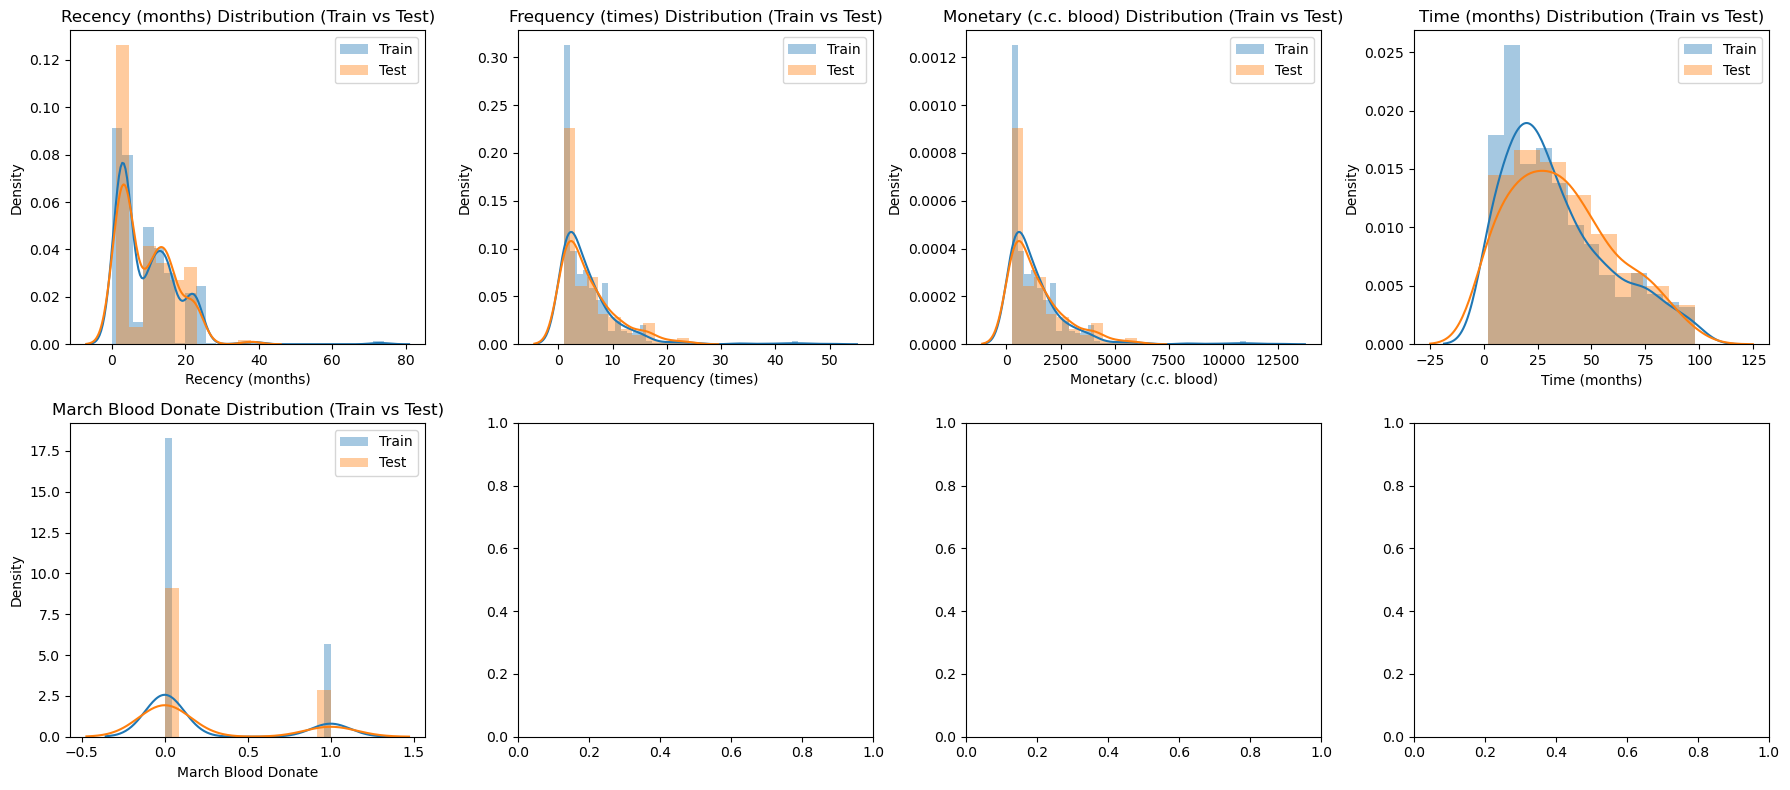

In [15]:
import warnings
warnings.filterwarnings("ignore")

def plot_histograms(df_train, df_test, target_col, n_cols=3): # x ekseninde iki deger arsina sigdirilacak kutu sayisini gösteriyor defult= 3 ama asagida 4 verebiliyoruz
    n_rows = (len(df_train.columns) - 1) // n_cols + 1        # -1 ile target sütununu almiyor n_rows histogramlari yerlestirecegimiz satir sayisini gösteriyor. asagida toplamda 2 satir halinde gösteriyor

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows)) # n_rows bir üstte 2 oldugunu görmustuk
    axes = axes.flatten()                                                        # birden fazla satir ve sütun varsa onlari tek bir parca halinde sergiler

    for i, var_name in enumerate(df_train.columns.tolist()): # bir üstte hangi degerleri aldigi görülüyor
        if var_name != 'is_generated':
            ax = axes[i]
            sns.distplot(df_train[var_name], kde=True, ax=ax, label='Train')
            if var_name != target_col:                                        # burda ikinci if icerisinde ilk yakaladigi degiskeni birakmiyor ve o eksene birde test egrisini cizdiriyor
                sns.distplot(df_test[var_name], kde=True, ax=ax, label='Test')
            ax.set_title(f'{var_name} Distribution (Train vs Test)')
            ax.legend()

    plt.tight_layout()    # görseller arasina uygun bosluklar birakarak düzeni optimize eder
    plt.show()            # olusan sonucu gösterir

plot_histograms(df_train[num_cols], df_test[num_cols], target_col, n_cols=4)


# bu modelin train ve test setlerinede nasil performans gösterecegine dair bir inference verebilir
# dagilimlari benzer olan veri setleri daha güvenilir ve tutarli sonclar verirler

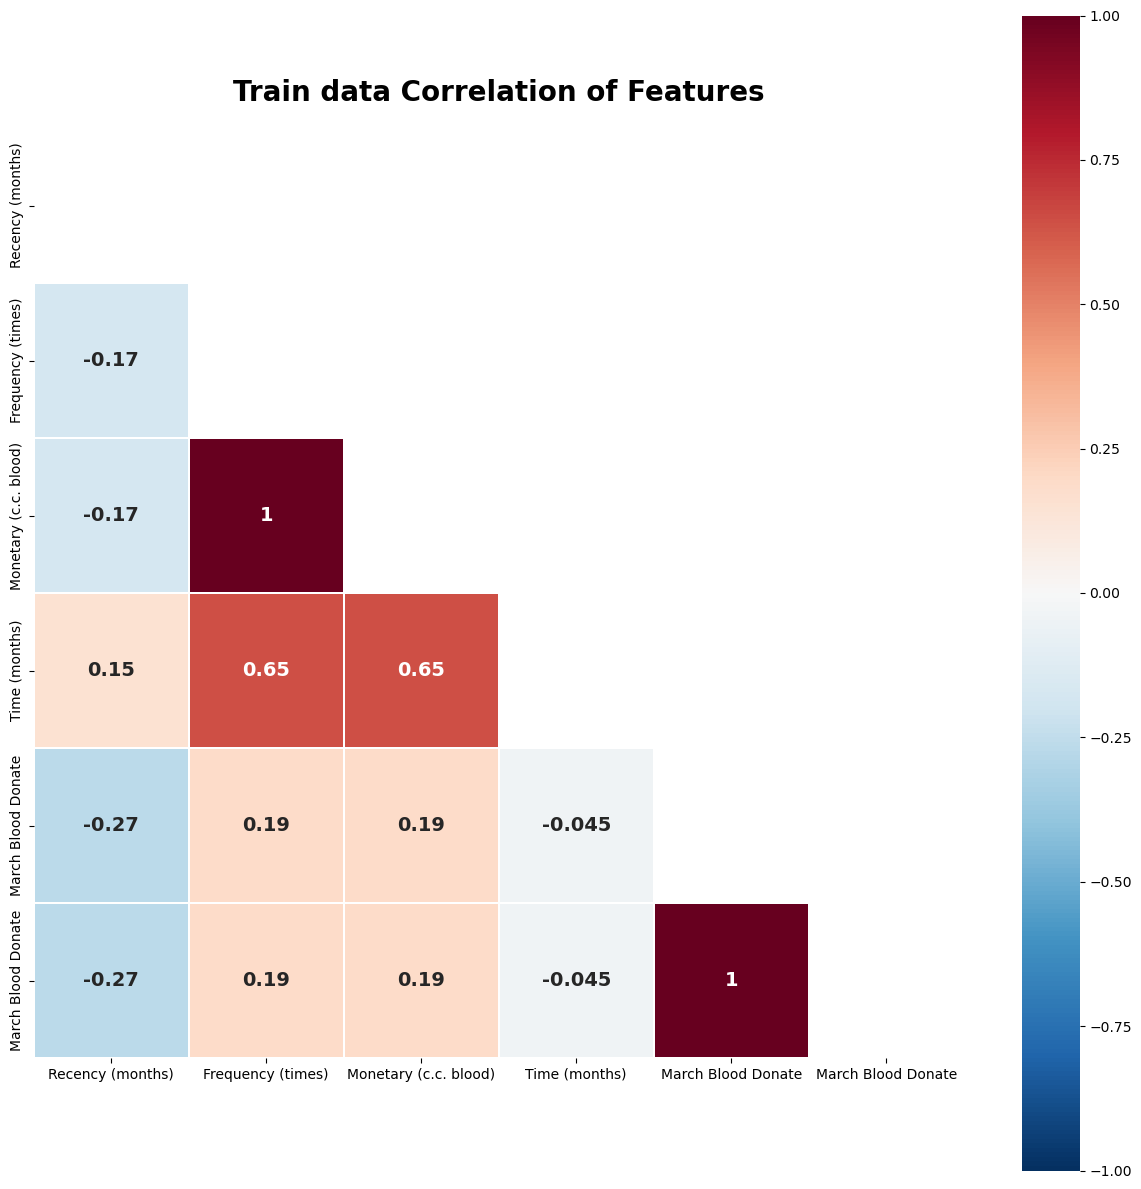

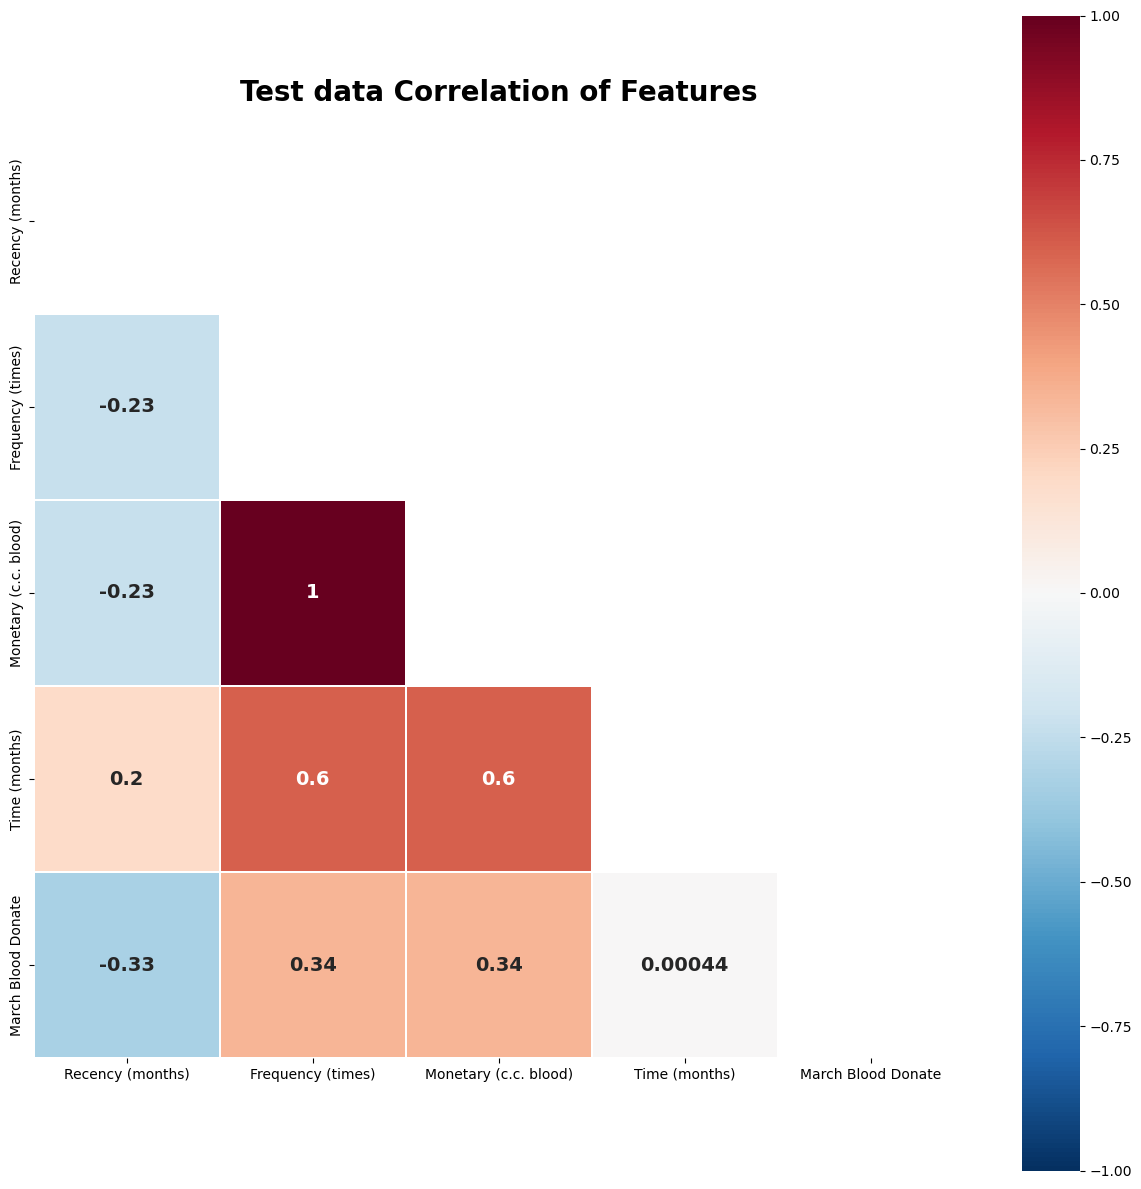

In [16]:
def plot_heatmap(df, title):
    # Create a mask for the diagonal element
    mask = np.zeros_like(df.astype(float).corr())   # heatmap in diger yarisini gizliyor. gereksiz bilgileri siliyor
    mask[np.triu_indices_from(mask)] = True         # matrisin ortssi hep 1 oluyor bunu engellemek icin

    # Set the colormap and figure size
    colormap = plt.cm.RdBu_r                        # renk skalasinin renklerini belirliyor Red be Blau oluyor
    plt.figure(figsize=(15, 15))

    # Set the title and font properties
    plt.title(f'{title} Correlation of Features', fontweight='bold', y=1.02, size=20)    # baslik ekler

    # Plot the heatmap with the masked diagonal element
    sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1.0,
    square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 14, 'weight': 'bold'},
    mask=mask)
    # df.astype(float).corr() bu haritayi cizer geri kalanlari ise cizgi genisligi, 
    # max ve min degerleri, renk skalasini, hücrelerin kare seklinde olmasini 
    # hücre icindeki yazilarin özellikleri 
    # ve maske uygulama yani diger yarisini gösterme

plot_heatmap(df_train[num_cols+[CFG.target_col]], title='Train data') # numeric degerler ve target sütunlarla heatmap cizer
plot_heatmap(df_test[num_cols], title='Test data')

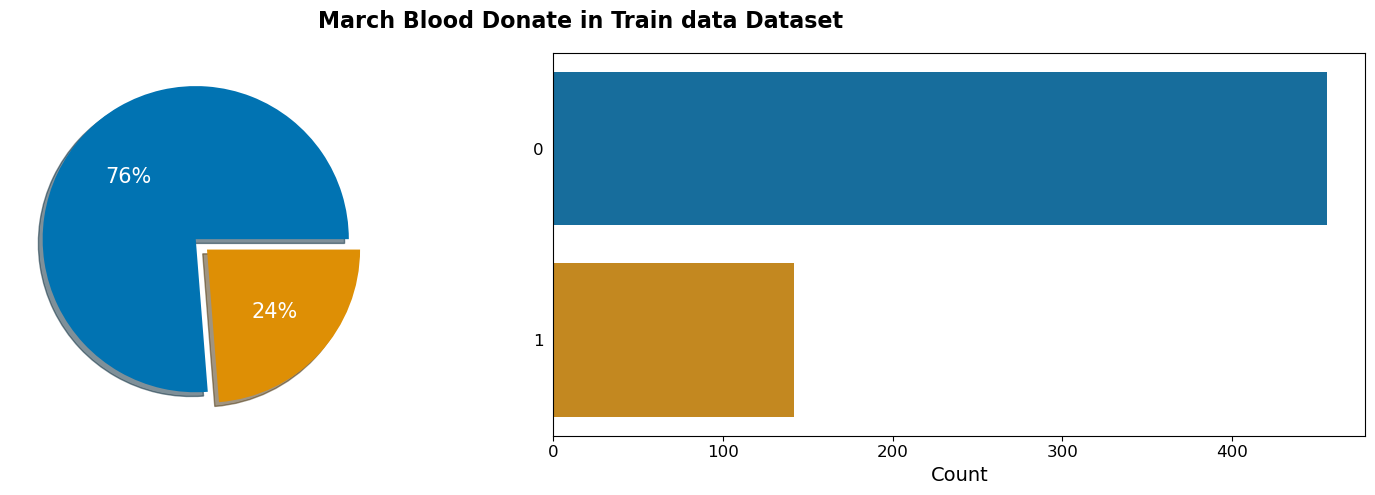

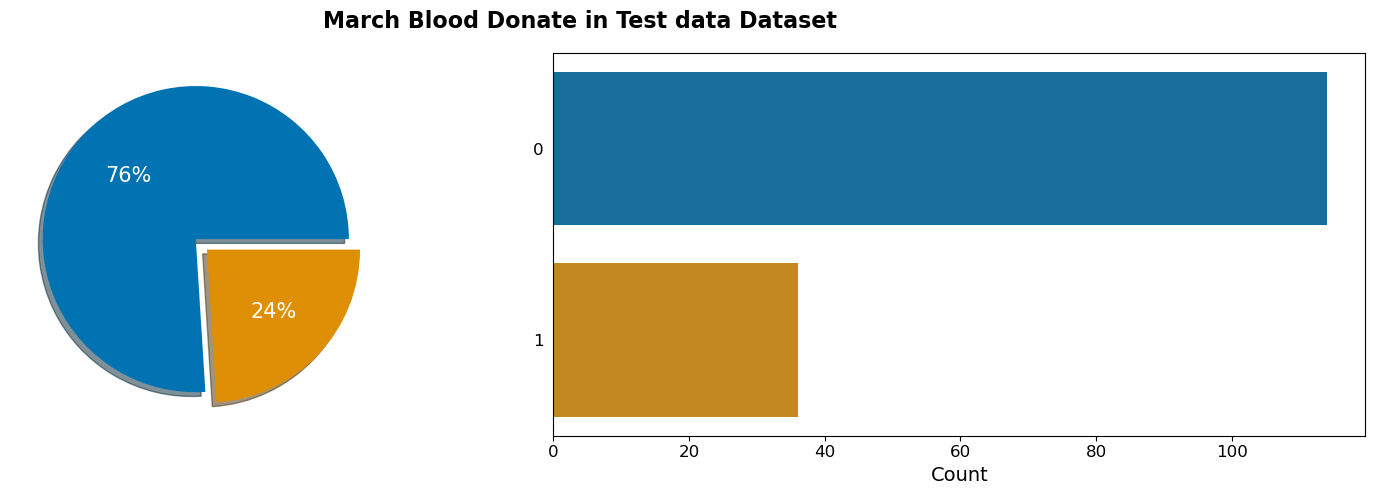

In [17]:
def plot_target_feature(df_train, target_col, figsize=(16,5), palette='colorblind', name='Train'):
    df_train = df_train.fillna('NaN')           # eksik degerler NaN ile doldurulur

    fig, ax = plt.subplots(1, 2, figsize=figsize)       # bu her iki grafik icin bir tek parca ortam olusturuyor ax[0] a biri ax[1] olan yere digeri gelecek
    ax = ax.flatten()                       # eksenleri düzene sokar

    # Pie chart
    pie_colors = sns.color_palette(palette, len(df_train[target_col].unique()))
    ax[0].pie(
        df_train[target_col].value_counts(),
        shadow=True,
        explode=[0.05] * len(df_train[target_col].unique()),
        autopct= '%1.f%%',                  # her dilimi n yüzde olarak degerini verir
        textprops={'size': 15, 'color': 'white'},
        colors = pie_colors                 # pasta dilimlerinin renklerii belirler
    )

    ax[0].set_aspect('equal')  # Fix the aspect ratio to make the pie chart circular

    # Bar plot
    bar_colors = sns.color_palette(palette)
    sns.countplot(
        data=df_train,
        y=target_col,
        ax=ax[1],
        palette=bar_colors
    )

    ax[1].set_xlabel('Count', fontsize=14)
    ax[1].set_ylabel('')
    ax[1].tick_params(labelsize=12)
    ax[1].yaxis.set_tick_params(width=0)  # Remove tick lines from y-axis

    fig.suptitle(f'{target_col} in {name} Dataset', fontsize=16, fontweight='bold') # baslik ekler
    plt.tight_layout()              # göreseller düzenler
    plt.show()

plot_target_feature(df_train, CFG.target_col, figsize=(16,5), palette='colorblind', name='Train data')
plot_target_feature(df_test, CFG.target_col, figsize=(16,5), palette='colorblind', name='Test data')

In [18]:
n_rows = (len(CFG.target_col) - 1) // n_cols + 1
n_rows

5

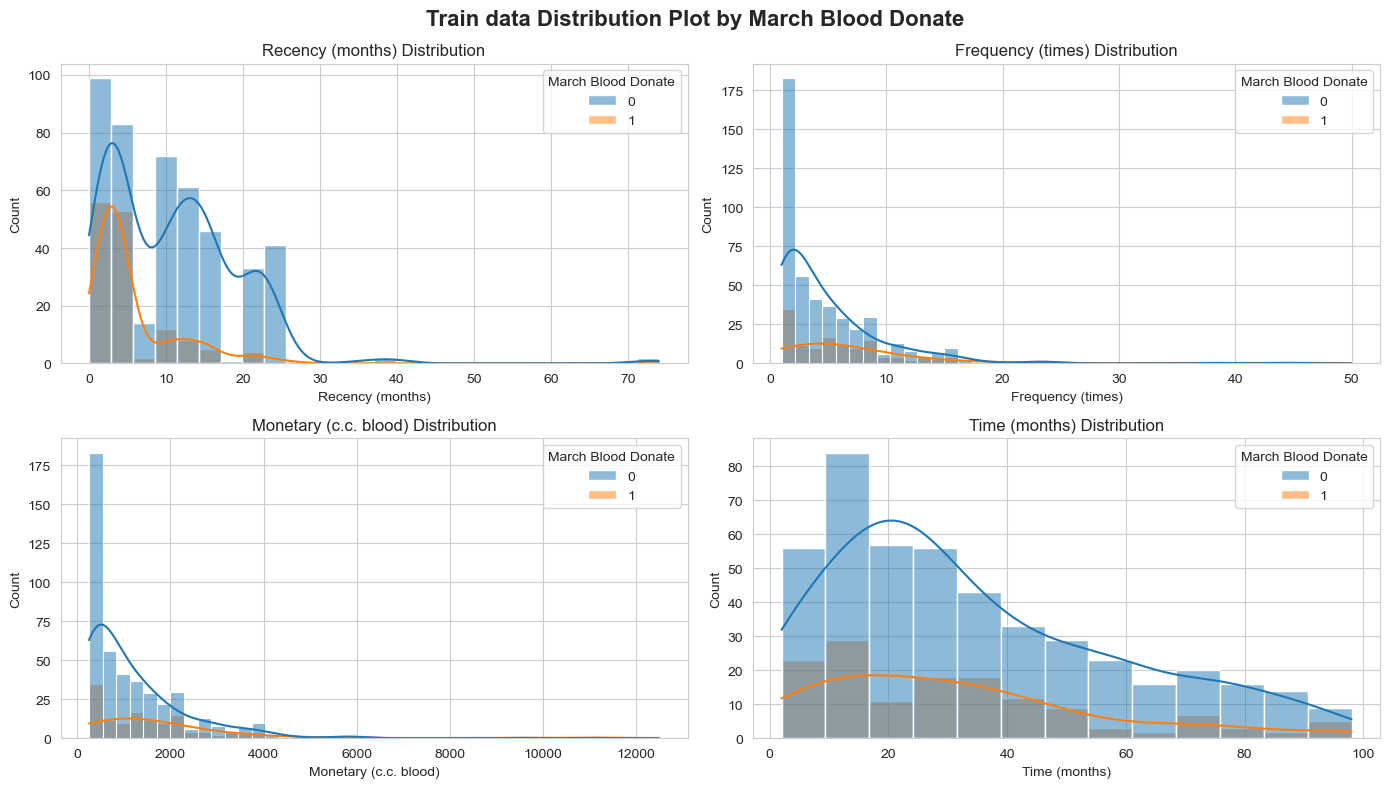

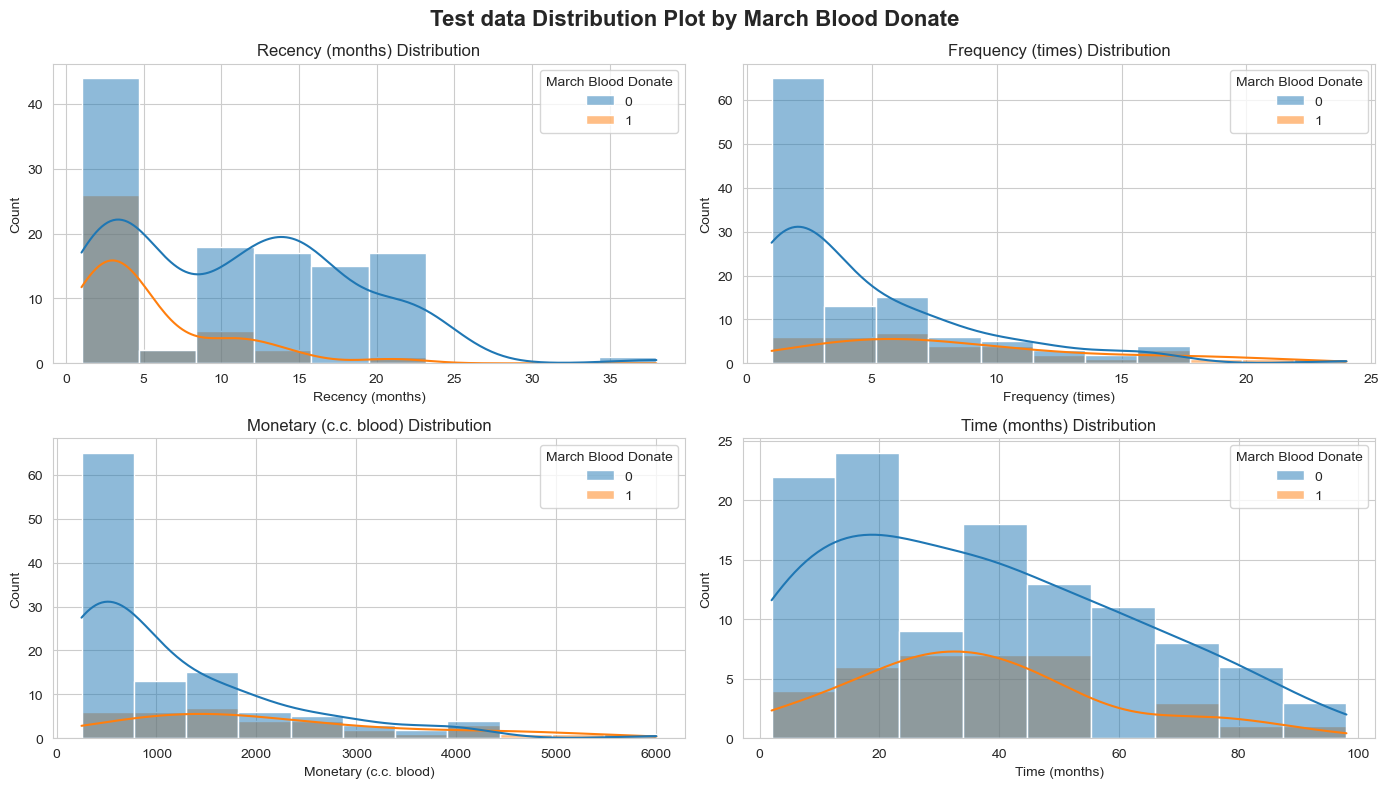

In [19]:
def plot_distribution(df, hue, title='', drop_cols=[]):    # renklendirme degiskeni , drop_cols=[] görsellestirilmek istenmeyen sütun
    sns.set_style('whitegrid')                             # arka planda izgaralar koyar

    cols = df.columns.drop([hue] + drop_cols)              # hue yani aslinda targer_col drop ediliyor ama burayi anlamadim
    n_cols = 2                                             # her satirda gösterilecek grafik sayisi
    n_rows = (len(cols) - 1) // n_cols + 1                 # grafikleri kac satirda yerlestirecegini hesaplar

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4*n_rows))    # Grafiklerin çizileceği figür ve eksenler (axes) oluşturulur.

    for i, var_name in enumerate(cols):
        row = i // n_cols
        col = i% n_cols

        ax = axes[row, col]                                 # hangi grafign nereye gidecegini hesaplar
        sns.histplot(data=df, x=var_name, kde=True, ax=ax, hue=hue)   # hue degiskenine göre renklendirme yapar
        ax.set_title(f'{var_name} Distribution')

    fig.suptitle(f'{title} Distribution Plot by {hue}', fontweight='bold', fontsize=16)  # en genel baslik
    plt.tight_layout()                                      # grafikler arasi bosluk otomatik olarak ayarlanir
    plt.show()

plot_distribution(df_train, hue=CFG.target_col, title='Train data')
    
plot_distribution(df_test, hue=CFG.target_col, title='Test data')

In [20]:
# verilerin dagilimlarini incelemek, veri setindeki egilimleri ve anormalikleri tespit etmeye yardimci olur
# outliers lar ve skewness ler modelin dogrulugunu etkileyebilir

# özelliklerin dagilimi normalizasyon, scaling ve encoder islemleri konusunda bize fikir verir

# features arasi iliskiyi incelemek ve target ile olan iliskisine bakmak hangi featuren
# target üzerinde ne kadar etkili oldugu konusunda bize fikir verir

# birbiriyle yüksek korelasyonlu featuresler modele overfitting tehlikesi verir

# featureslerin birbiri üzerindeki etkisine bakarak bazi featureslerin silinmesini veya yeni degiskenler olusturma konusunda yardimci olabilir

# feature selection modelin karmasikligini complexity i azaltmak ve overfitting'i önlemek icin önemlidir

# feature engineering olan featureslerden yeni featuresler cikarma var olani silme, ikisini birlestirip yeni bir featues yaratma

# tarih sütunundan gün ay yil gibi yeni sütunlarin olusturulmasi feature engineeringe girer

# categorik verilerin one-hot encodr label encoding , get_dummies gibi islemlerde dogrudan modele verilemeyen 
# categorik sütunlarin modele uygun hale getirlmesi feature engineering olarak ele alinabilir

# NaN verileri doldurmak, silmek ve benzeri islemler bu feture engineering alanina girer
# aslinda features ile yapilan islemler bir nevi EDA calismalari feature engineering denebilir

# iyi hazirlamis data basit modellerde bile yüksek performans almamaiza yardimci olabilir

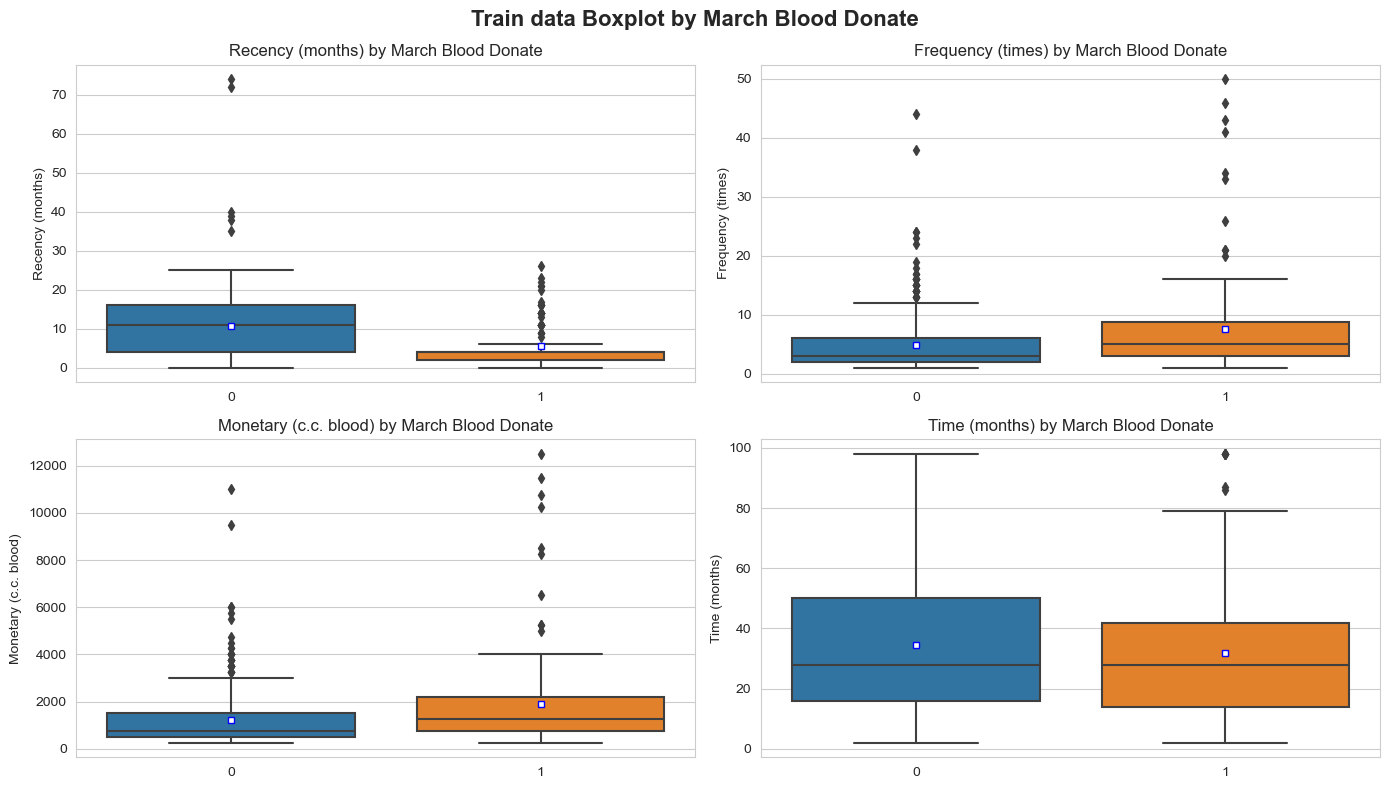

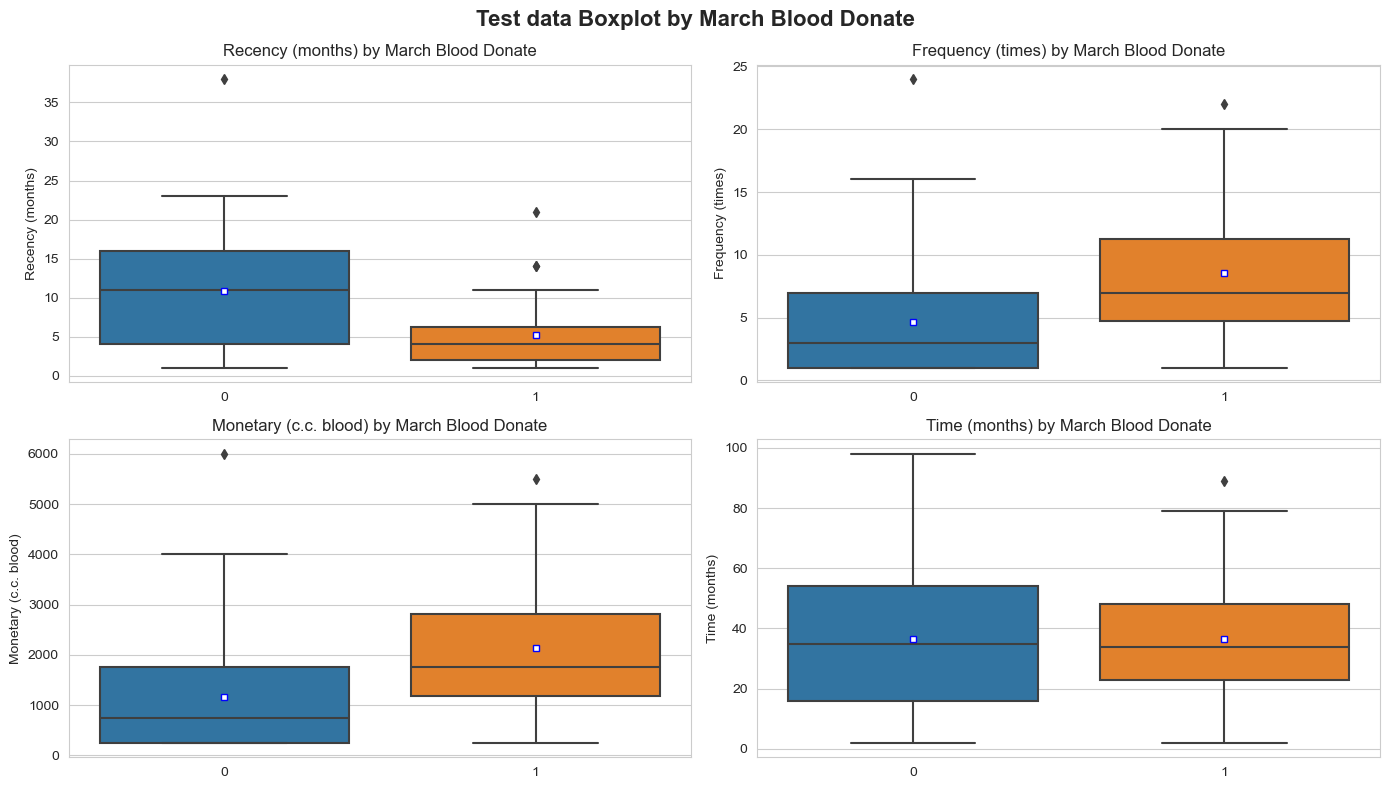

In [21]:
def plot_boxplot(df, hue, title='', drop_cols=[], n_cols=3):
    sns.set_style('whitegrid')

    cols = df.columns.drop(hue)
    cols = cols.drop(drop_cols)
    num_cols = [col for col in cols if col not in cat_cols]  # numerical sütunlar aliniyor
    n_rows = (len(num_cols) - 1) // n_cols + 1               # grafiklerin serpilecegi satir sayilari hesaplaniyor

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4*n_rows))  # ana ortak figure

    for i, var_name in enumerate(num_cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.boxplot(data=df, x=hue, y=var_name, ax=ax, showmeans=True,  # ortalama deger grafikte gösteriliyor
        meanprops={'marker':'s', 'markerfacecolor':'white', 'markeredgecolor':'blue', 
        'markersize':'5'})

        ax.set_title(f'{var_name} by {hue}')
        ax.set_xlabel('')

    fig.suptitle(f'{title} Boxplot by {hue}', fontweight = 'bold', fontsize=16)
    plt.tight_layout()
    plt.show()


plot_boxplot(df_train, hue=CFG.target_col, title='Train data', n_cols=2)
plot_boxplot(df_test, hue=CFG.target_col, title='Test data', n_cols=2)

# burda her bir features'in target ile olan iliskisini inceliyoruz
# x ekseni icince 0 ve 1 degerleri var. onlarin ne kadar aralikta olduguna bakiyoruz

In [22]:
# aslinda kutunun her bir bölümünde verinin yaklasik %25 var diyebiliriz
# kutu icindeki cizgi median degerini gösterir. bu veri setinin egilime hakkinda bilgi verir
# o biyik tarafinda kalan degerler outlier olarak degerlendirilmez. en disarida kalan degerleri öyle degerlendirebiliriz

# median degeri veri setinin egilimini gösterirken, kutunun büyüklügü veri setinin ne kdar yayildigini gösterir
# kisa bir kutu verilerin sikisik bir seklde dagildigini gösterir
# uzun kutuda veriler fazla yayildigi icin, varyans var diyebiliriz

# aykiri degerler incelenmelidir bunlar istatistik degerleri ortalama , median, standart sapma gibi degerleri etkileyip
# yaniltici sonuclara yol acabilir

# ve bu aykiriliklar modelin patern yakalamasini zorlastirabilir ve düsük accuracy sonuclarina neden olabilr

# Interquantil range verilerin %50 sini temsil eder

In [23]:
# aykiri degerler ya kaldirilabilir veya diger degerlerle degistirilebilir mesela median gibi

# Z score bir veri setinin ortalamadan ne kadar uzakta oldugunu gösteren bir birimdir
# z score 0 ise deger ortalamaya esittr
# Z score pozitif ise deger ortalamadan büyüktür
# Z score negatif ise deger ortalamadan kücüktür

# Z scoru +2 olan bir deger ortalamadan 2 standart sapma uzakta anlamina geliyor
# Z score -3 ve +3 arasinda olmayan degerler aykiri deger olarak adlandirlir

In [24]:
# Z scoru farkli ölceklere sahip verileri karsilastirabilmek icin kullaniriz
# örnegin farkli testlerden elde edilen sonuclari degerlendirmek icin

# Anomali tespitinde kullanilirz. beklenmedik olaylari belirlemede

# Z score veri setinin normal dagilima yakin oldugu durumlarda anlamlidir
# zeten grafigide normal grafik gibi oluyor kitaplarda

In [25]:
# bazi dönüsümler yaparak sapmalar azaltilabilir
# log dönüsümü: veriler logaritmik ölcege alinir ve büyük degerler kücülür
# büyük degerler daha fazla etkilenecegi icin, aradaki ucurumlar kapanir

# karekök dönüsümü ile degerler kücültülebilr
# bu dönüsümler pozitif degerler üzerinde yapilir eger negatif degerler varsa, sabit degerler eklenierek
# pozitif hale getirilir

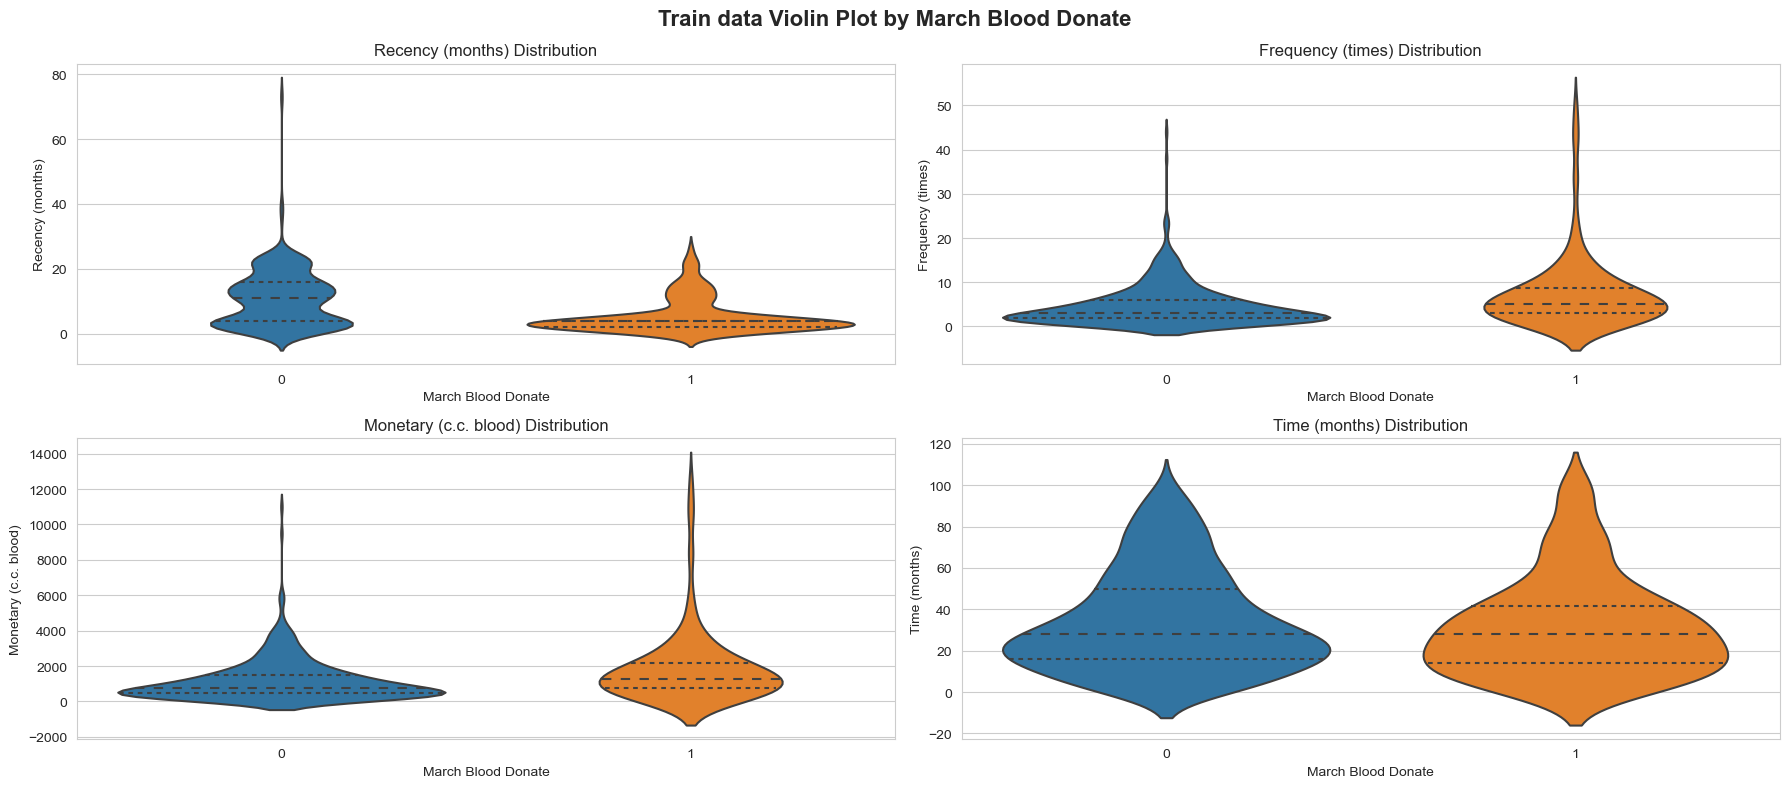

In [26]:
def plot_violinplot(df, hue, title='', drop_cols=[], n_cols=2):
    sns.set_style('whitegrid')

    cols = df.columns.drop([hue] + drop_cols)
    num_cols = [col for col in cols if col not in cat_cols]
    n_rows = (len(num_cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))

    for i, var_name in enumerate(num_cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.violinplot(data=df, x=hue, y=var_name, ax=ax, inner='quartile')
        ax.set_title(f'{var_name} Distribution')

    fig.suptitle(f'{title} Violin Plot by {hue}', fontweight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()

plot_violinplot(df_train, hue=CFG.target_col, title='Train data', n_cols=2)

# sayisal degerlrin dagilimi icin kulanilabilir
# yine target degiskene göre dagilimlari gösterir
# boxplota ilavaten verilerin nerelerde daha yogun oldugunu gösterir

# Feature Engineering

In [27]:
# choose the tactics

# CFG.encoder = True
# CFG.height_solver = True
# CFG.scaler = True

# Functions(Utils)

In [28]:
# ! pip install imbalanced-learn
# imbalance veri setleriyle calisirken kullanilir
# SMOTE (Synthetic Minority Over-sampling Technique) 
# ADASYN (Adaptive Synthetic Sampling) 


# 1- en basit over sampling yöntemi veri kümesinden rastgele degerler alinarak onlari tekrardan veri setine eklemektir
# ama ayni verilerden bircok olacagi icin model overfotting tehlikesi olabilir

# 2- SMOTE (Synthetic Minority Over-sampling Technique):
# bu yöntem her bir azinlik örnek kümesini ele alir ve bunlarin komsularindan yeni noktalar elde eder
# ve yeni degerlerde noktalar üretir. ama modelin cesitliligine cok fayda vermez ama eskisinden iyi olabilir

# 3-ADASYN (Adaptive Synthetic Sampling):
# buda Smote ile ayni isi yapar ama bu daha cok zor ögrenilen yerlerde yani veri noktalarinin en ay oldugu yerlere odaklanarak 
# orda yeni veriler elde eder

# over-sampling faydalari:
# azinlik veri kümesinin daha iyi temsil edilmesine yardimci olur 
# siniflarin dengesizligini azaltir
# modelin genellestirme(model generalization) yetenegini iyilestirebilir

# zararlari :
# yapay veri ekledikleri icin gercek veri yapisi bozulur
# yanlis uygulandiginda modelin yaniltici sonuclar vermesine neden olur


# model generalization bunu arttirmak icin gercek verilerin sayisini  ve cesitliligini arttirmaliyiz
# ne kadar cok cesitli olursa, yeni durumlara o kadar hazirlikli olur

# cok karmasik modeller yani cok featuresli modeller overfitting yapmaya meyillidir
# cok basit modellerde underfitting yapabilir. bu karmasikligin dogru sekilde ayarlanmasi gerekir

# Model karmasikliginin ayarlanmasi
# 1-  projenin ihtiyacina göre bir model secilmeli. bazi problemler icin basit bir liner model bile iyi sonuclar verebilir
# cok karmasik modellerde Deep Learning te uygulanabilir

# 2- Regularization Ridge ve Lasso ile ile bazi modelin komlexliligine katki saglanabilir

# 3- Cross validaton ile modelin karmasiklik düzeyinin basarisini degerlendirebiliriz
#en iyi karmasikligi bulmada, CV sonuclarini göz önüne alabiliriz

# 4- modelleri kullanirken hiper paramaetleri dogru secmek


In [29]:
# ! pip install imbalanced-learn

In [30]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE, ADASYN


class fonks:
    """
    Class'ın amacı:
    - Sıkça kullanılacak fonksiyonları oluşturmak ve kolayca çağırmak.
    - Daha düzenli ve değiştirilebilir bir programlama yapmak.
    """

    label = 'Fertility'

    def overSample(X, y, tactic = 'smote'):
        if tactic == 'smote':
            smote = SMOTE()
            X_resampled, y_resampled = smote.fit_resample(X, y)
            return X_resampled, y_resampled
        elif tactic == 'adasyn':
            adasyn = ADASYN()
            X_resampled, y_resampled = adasyn.fit_resample(X, y)
            return X_resampled, y_resampled


    def trainTest(X, y, test_size = 0.2, stratify = None): # aslinda yukarida zaten train ve test olarak bölmüstük ama galina simdi Target degerlerinide ayiracaz
        """
        Alınan datayı istenen oranda Train & Test şeklinde bölüp X_train , X_test , y_train , y_test adındaki 4 değişken döndürür.

        Parameters
        ----------
        data : pandas.DataFrame
            Train & Test olarak bölünecek veri seti.
        label : str, optional
            Hedef değişkenin adı, by default 'Knowledge'.
        test_size : float, optional
            Test veri setinin boyutu, by default 0.2.

        Returns
        -------
        tuple
            X_train, X_test, y_train, y_test
        """

        if stratify == 'y':
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=53, stratify=y)
        else:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=53)
        
        return X_train, X_test, y_train, y_test

    

    def simple_scores(y_train, y_train_pred, y_test, y_pred, name = 'Model', task = 'class'):
        """
        Model ismini , Train ve Test'e ait tahmin ve gercek degerleri alip, alinan accuracy, f1, precision skorlari yazdirir
        Hem regression hemde Classification taskleri icin hazirlanmistir.

        Parameters
        ________________
        y_train : pandas.DataFrame
                  Train verisinin gercek degerleri
        y_train_pred : pandas.DataFrame 
                  Train verisne ait tahmin degerleri
        y_test  : pandas.DataFrame
                  test verisinin gercek degerleri
        y_pred  : pandas.DataFrame 
                  test verisinin tahmin degerleri
        name    : str optional
                  tahmin etmede kullanilacak model ismi by default 'Model'
        task    : str optional, default 'reg'
                  Görevin type'i 'reg' or 'class'


        Returns
        _______
        print
            Train accuracy, Train F!, train Precision, Test Acc, Test F1, Test Precision

        """

        if task == 'class':
            print(f'{name} Train Accuracy : {accuracy_score(y_test, y_pred)}')
            print(f'{name} Train Recall : {recall_score(y_test, y_pred, pos_label=1)}') # pos_label: positif sinif olarak hangisinin alinacagini yani target icinde 1 degerlerin bizim istedigimiz degerler oldugunu söylüyor
            print(f'{name} Train Precision : {precision_score(y_test, y_pred, pos_label=1)}')
            print(f'{name} Train F1 : {f1_score(y_test, y_test_pred, pos_label=1)}')

            print("\n**************************\n")

            print(f'{name} Test Accuracy : {accuracy_score(y_train, y_train_pred)}')
            print(f'{name} Test Recall : {recall_score(y_test, y_pred, pos_label=1)}') 
            print(f'{name} Test Precision : {precision_score(y_test, y_pred, pos_label=1)}')
            print(f'{name} Test F1 : {f1_score(y_test, y_pred, pos_label=1)}')
        elif task == 'reg':
            print(f'{name} Train R2 : {r2_score(y_train, y_train_pred)}')
            print(f'{name} Train Mae : {mean_absolute_error(y_train, y_train_pred)}')
            print(f'{name} Train RMSE : {mean_squared_error(y_train, y_train_pred)**0.5}')
            print(f'{name} Train MSE : {mean_squared_error(y_train, y_train_pred)}')

            print("\n**************************\n")
            
            print(f'{name} Test R2 : {r2_score(y_test, y_pred)}')
            print(f'{name} Test MEa : {mean_absolute_error(y_test, y_pred)}')
            print(f'{name} Test RMSE : {mean_squared_error(y_test, y_pred)**5}')
            print(f'{name} Test MSE : {mean_squared_error(y_test, y_pred)}')


    # bu notebookta bu fonksiyonlar kullanilmamis ama kalip oldugu icin burda kaliyor ama sunacagin bir proje ise silmeliyim
    def get_r2_score(y_true, y_pred):
        return r2_score(y_true, y_pred)
    def get_mae_score(y_true, y_pred):
        return mean_absolute_error(y_true, y_pred)
    def get_rmse_score(y_true, y_pred):
        return mean_squared_error(y_true, y_pred)**0.5
    def get_mse_score(y_true, y_pred):
        return mean_squared_error(y_true, y_pred)

    def get_acc_score(y_true, y_pred):
        return accuracy_score(y_true, y_pred)
    def get_f1_score(y_true, y_pred):
        return f1_score(y_true, y_pred, post_label=1)
    def get_recall(y_true, y_pred):
        return recall_score(y_true, y_pred, post_label=1)
    def get_roc_auc(y_true, y_pred):
        return roc_auc_score(y_true, y_pred)
    

    def eval_metric(y_train, y_train_pred, y_test, y_pred, name='Model'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Confusion_matrix ve Classification_report'u yazdırır..
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'ı 'reg' or 'class'            
            
        Returns
        -------
        print
            Train Confusion_matrix , Train Classification_report , Test Confusion_matrix , Test Classification_report
        """

        print(f'Test_Set {name}')
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print()
        print(f'Train Set {name}')
        print(confusion_matrix(y_train, y_train_pred))
        print(classification_report(y_train, y_train_pred))


    
    




In [ ]:

# True Positif veya False Negative gibi isimler modelin verdigi cevaba göre verilen isimler

# True Positive : bunun anlami model buna positive demis yani 1 olarak etiketli olan deger demis ve önünde True var. demekki dogru söylemis
# True Negative : bunun anlami model buna Negative demis yani senin etiketin 0 demis ve True olarak yani dogru bilmis aslinda o 0 mis zaten
# False Negative : bunun anlami model buna sen Negative sin demis yani senin etiketin 0 ama False olmus yani yanlis bilmis, yanlis olduguna göre bu gercekte 1 olmasi gerekiyormus
# False Positive: bunun anlami model buna sen Positive sin demis yani senin etiketin 1 demis ama False olmus yani yanlis bilmis aslinda bu degerin 0 olmasi gerekiyormus

# recall gercekte 1 olan degerlerin ne kadar dogru ölcüldügüne bakar
# yüksek bir recall degeri true positive degerlerinin fazla oldugunu gösterir 
# yani true positive demek modelimiz sen positive sin yani senin etiketin 1 demis ve true olmus yani dogru bilmis





# recall ve precision arasindaki fark:
# birbirlerine cok yakinlar ama odak noktalari farkli diyebiliriz
# precisionda dogru ve yanlislar hesaba katilir ve oran bu sekilde bulunur
# yani dogru olanlarin yüzde kac oldugunu buluyoruz diyebilizi
# paydaya modelin tüm degerlrini yukariyada dogru olanlarin sayisini
# recall de ise paydaya tüm dogrularin sayisi ve paya modelin dogru dediklerinin sayisi 
# precision genel bir basari ölcer ama recall tamamen 1 olanlarin basarisina odaklanir
# model degerlendirirken ikisine bakilip ve ilava olarak bunlarin harmonik ortalamasi olan F1 score da göz önüne alinir.


